# Quantum Circuits and Operations

In [1]:
from qiskit import Aer, execute, transpile, IBMQ, QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import *
import numpy as np

#### Extracting info from a quantum circuit

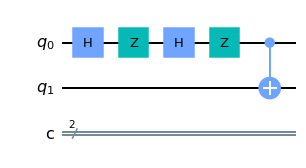

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.z(0)
qc.h(0)
qc.z(0)
new_qc = QuantumCircuit(2,2)
new_qc.cx(0,1)
total = qc.compose(new_qc)
total.draw("mpl")

In [3]:
total.depth()

5

In [4]:
total.width()

4

In [5]:
total.size()

5

In [6]:
total.count_ops()

OrderedDict([('h', 2), ('z', 2), ('cx', 1)])

In [7]:
total.clbits

[Clbit(ClassicalRegister(2, 'c'), 0), Clbit(ClassicalRegister(2, 'c'), 1)]

In [8]:
total.data

[(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], [])]

In [9]:
total.num_qubits

2

In [10]:
total.num_clbits

2

In [11]:
total.global_phase

0

#### Using the append() instruction

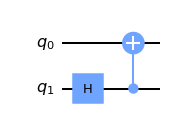

In [12]:
from qiskit.circuit.library import CXGate

qc = QuantumCircuit(2)
qc.h(1)
cx_gate = CXGate()
qc.append(cx_gate, [1,0])
qc.draw("mpl")

#### Using the bind parameters method

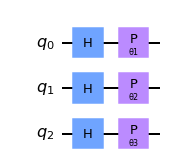

In [13]:
from qiskit.circuit import QuantumCircuit,\
                           Parameter

theta1 = Parameter('θ1')
theta2 = Parameter('θ2')
theta3 = Parameter('θ3')

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.p(theta1,0)
qc.p(theta2,1)
qc.p(theta3,2)

qc.draw("mpl")

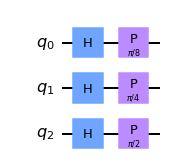

In [14]:
import math
b_qc = qc.bind_parameters({theta1: math.pi/8,
                          theta2: math.pi/4,
                          theta3: math.pi/2})

b_qc.draw("mpl")

#### Using the copy() method

In [15]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
new_qc = qc.copy()

#### Using the decompose() method

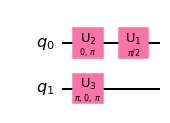

In [16]:
qc = QuantumCircuit(2)
qc.h(0)
qc.s(0)
qc.x(1)
decomposed_qc = qc.decompose()
decomposed_qc.draw("mpl")

#### Using the from_qasm_file() method

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
s q[0];
x q[1];



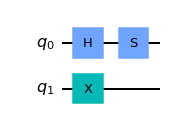

In [17]:
qc.qasm(formatted = True, filename = "file.qasm")
read_qc = QuantumCircuit.from_qasm_file("file.qasm")
read_qc.draw("mpl")

#### Using the from_qasm_str() method

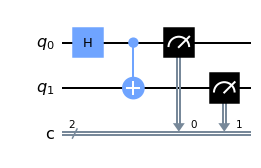

In [18]:
qasm_str = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
"""
new_qc = QuantumCircuit.from_qasm_str(qasm_str)
new_qc.draw("mpl")

#### Using the initialize() method

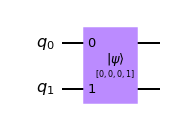

In [19]:
qc = QuantumCircuit(2)
qc.initialize([0, 0, 0, 1]) # initializes the statevector of the qubit(s)
qc.draw("mpl")

#### Using the reset() method

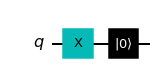

In [20]:
qc = QuantumCircuit(1)
qc.x(0)
qc.reset(0) # resets the state of the qubit to |0>
qc.draw("mpl")

#### Using the qasm() method

In [21]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qasm_str = qc.qasm()
print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];



#### Using the to_gate() method

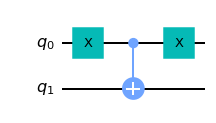

In [22]:
anti_cnot_qc = QuantumCircuit(2)
anti_cnot_qc.x(0)
anti_cnot_qc.cx(0,1)
anti_cnot_qc.x(0)

anti_cnot_qc.draw("mpl")

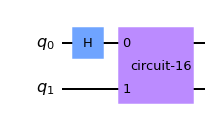

In [23]:
anti_cnot_gate = anti_cnot_qc.to_gate()
qc = QuantumCircuit(2)
qc.h(0)
qc.append(anti_cnot_gate, [0,1])
qc.draw("mpl")

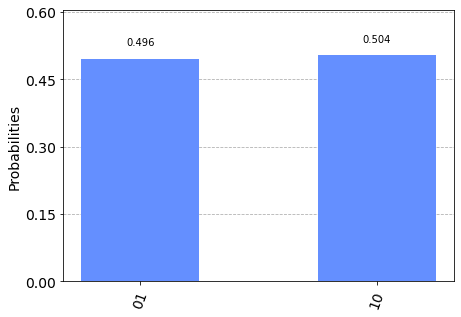

In [24]:
qc.measure_all()
result = execute(qc, Aer.get_backend("qasm_simulator"), shots = 1000).result().get_counts()
plot_histogram(result)

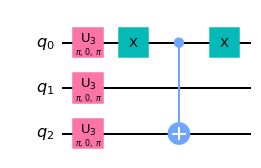

In [25]:
qc = QuantumCircuit(3)
qc.x([0,1,2])
qc.append(anti_cnot_gate, [0,2])

qc.decompose().draw("mpl")

#### Using the to_instruction() method

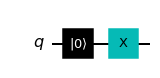

In [26]:
reset_one_qc = QuantumCircuit(1)
reset_one_qc.reset(0)
reset_one_qc.x(0)

reset_one_qc.draw("mpl")

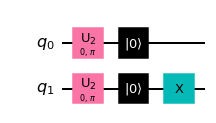

In [27]:
reset_one_inst = reset_one_qc.to_instruction()

qc = QuantumCircuit(2)
qc.h([0,1])
qc.reset(0)
qc.append(reset_one_inst, [1])

qc.decompose().draw("mpl")

#### Saving state

In [28]:
anti_cnot_qc = QuantumCircuit(2)
anti_cnot_qc.x(0)
anti_cnot_qc.cx(0,1)
anti_cnot_qc.x(0)
anti_cnot_gate = anti_cnot_qc.to_gate()
qc = QuantumCircuit(2)
qc.h(0)
qc.append(anti_cnot_gate, [0,1])
qc.save_state()
backend = Aer.get_backend("aer_simulator")
qc.measure_all()
sv = execute(qc, backend).result().get_statevector()
counts = execute(qc, backend).result().get_counts()
array_to_latex(result)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
plot_histogram(counts)

#### Using the QuantumRegister Class

In [ ]:
from qiskit import QuantumRegister, \
                   ClassicalRegister

qr = QuantumRegister(3, 'q')
scratch = QuantumRegister(1, 'scratch')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, scratch, cr)

qc.h(qr)
qc.x(scratch)
qc.h(scratch)
qc.cx(qr[0], scratch)
qc.cx(qr[2], scratch)
qc.barrier(qr)
qc.h(qr)
qc.measure(qr, cr)

qc.draw("mpl")

In [ ]:
qr.name

In [ ]:
qr.size

In [ ]:
cr.name

In [ ]:
cr.size

### The ControlledGate Class

#### Using the num_ctrl_qubits attributes

In [ ]:
from qiskit.circuit.library import CCXGate

toffoli = CCXGate()
print(toffoli.num_ctrl_qubits)

#### Using the ctrl_state method

In [ ]:
toffoli = CCXGate()
toffoli.ctrl_state = 2

toffoli.definition.draw("mpl")

#### Defining a custom controlled gate

In [ ]:
from qiskit import QuantumCircuit
import math

p16_qc = QuantumCircuit(1)
p16_qc.p(math.pi/16, 0)

p16_gate = p16_qc.to_gate()

p16_gate.definition.draw("mpl")

In [ ]:
ctrl_p16 = p16_gate.control(3)

ctrl_p16.definition.draw("mpl")

In [ ]:
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
qc.append(ctrl_p16,[0,1,2,3])

qc.decompose().draw("mpl")

### Creating a Parameter Instance

#### Using the parameter vector class

In [ ]:
from qiskit.circuit import QuantumCircuit,\
                           ParameterVector

theta = ParameterVector('θ', 3)

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.p(theta[0],0)
qc.p(theta[1],1)
qc.p(theta[2],2)

qc.draw("mpl")

In [ ]:
b_qc = qc.bind_parameters({theta: [math.pi/8,
                                   math.pi/4,
                                   math.pi/2]})

b_qc.draw("mpl")